# Part 1. Exploratory data analysis


## Data Overview

Getting the know and understand of data.

In [126]:
#importing libs

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1. Reading Excel File
    - Index Column set to `customer_id`
2. Getting Familiar with data using `head()`

In [127]:
rapido = pd.read_excel("Rapido Data Analyst Assignment DataSet (1).xlsx") # customer_id as index
rapido.head()

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
0,ID001,CUST_001,1546709270211,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37
1,ID002,CUST_002,1546709309524,17.490189,78.415512,17.450548,78.367294,11.991,24.075200,119
2,ID003,CUST_003,1546709331857,17.370108,78.515045,17.377041,78.517921,1.322,8.708300,27
3,ID004,CUST_004,1546709358403,17.439314,78.443001,17.397131,78.516586,11.822,24.037550,121
4,ID005,CUST_005,1546709386884,17.432325,78.381966,17.401625,78.400032,6.978,16.120867,58


Data's Dimensions

In [128]:
print('Dataframe Dimensions \n MEASURES    :',rapido.shape[0],' \n DIMENSIONS  :',rapido.shape[1])

Dataframe Dimensions 
 MEASURES    : 44587  
 DIMENSIONS  : 10


In [129]:
print('\nDimension :\n',rapido.columns.tolist() )


Dimension :
 ['trip_id', 'customer_id', 'timestamp', 'pick_lat', 'pick_lng', 'drop_lat', 'drop_lng', 'travel_distance', 'travel_time', 'trip_fare']


Serial No.|Column names|       Description
---|---|---
1 |        trip_id |             Unique identifier for customer
2 |         customer_id|         Unique identifier for customer
3 |         timestamp  |         Time stamp of the trip in Epoch format(**in ms**)
4 |         pick_lat   |         Latitude of the pickup location
5 |         pick_lng       |     Longitude of the pickup location
6 |         drop_lat        |    Latitude of the drop location
7 |         drop_lng         |   Longitude of the drop location
8 |         travel_distance   |  Distance of trip measured in KMs
9 |         travel_time        | Duration of the trip measured in Minutes
10|          trip_fare           |Trip fare calculated in Rupees

In [130]:
print ('\nThere are no missing values:\n', rapido.isnull().sum())


There are no missing values:
 trip_id            0
customer_id        0
timestamp          0
pick_lat           0
pick_lng           0
drop_lat           0
drop_lng           0
travel_distance    0
travel_time        0
trip_fare          0
dtype: int64


In [131]:
print ('\nUnique values :  \n',rapido.nunique())


Unique values :  
 trip_id            44587
customer_id        19139
timestamp          44586
pick_lat           29677
pick_lng           19902
drop_lat           29962
drop_lng           20530
travel_distance    11756
travel_time        43980
trip_fare            284
dtype: int64


In [132]:
print('Variables Data Types\n',rapido.dtypes)

Variables Data Types
 trip_id             object
customer_id         object
timestamp            int64
pick_lat           float64
pick_lng           float64
drop_lat           float64
drop_lng           float64
travel_distance    float64
travel_time        float64
trip_fare            int64
dtype: object


In [133]:
rapido.describe()

,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
count,4.458700e+04,44587.000000,44587.000000,44587.000000,44587.000000,44587.000000,44587.000000,44587.000000
mean,1.546632e+12,17.427919,78.435542,17.427891,78.434897,5.094359,15.819835,53.872833
std,1.518684e+08,0.030049,0.053333,0.037722,0.054965,3.365008,23.462865,33.430462
min,1.546368e+12,17.330339,78.308258,12.921696,77.548103,-1.000000,0.022750,20.000000
25%,1.546503e+12,17.405327,78.386562,17.405660,78.385010,2.744500,8.428525,36.000000
50%,1.546611e+12,17.432136,78.438866,17.431213,78.438164,4.299000,13.126250,46.000000
75%,1.546772e+12,17.446777,78.480839,17.446907,78.480255,6.679500,20.111167,60.000000
max,1.546886e+12,17.529791,78.600647,17.736155,78.634804,52.801000,4134.388700,1670.000000


We can clearly exlude pick and drop longitude 

In [134]:
rapido.min()

trip_id                    ID001
customer_id             CUST_001
timestamp          1546367527135
pick_lat                 17.3303
pick_lng                 78.3083
drop_lat                 12.9217
drop_lng                 77.5481
travel_distance               -1
travel_time              0.02275
trip_fare                     20
dtype: object

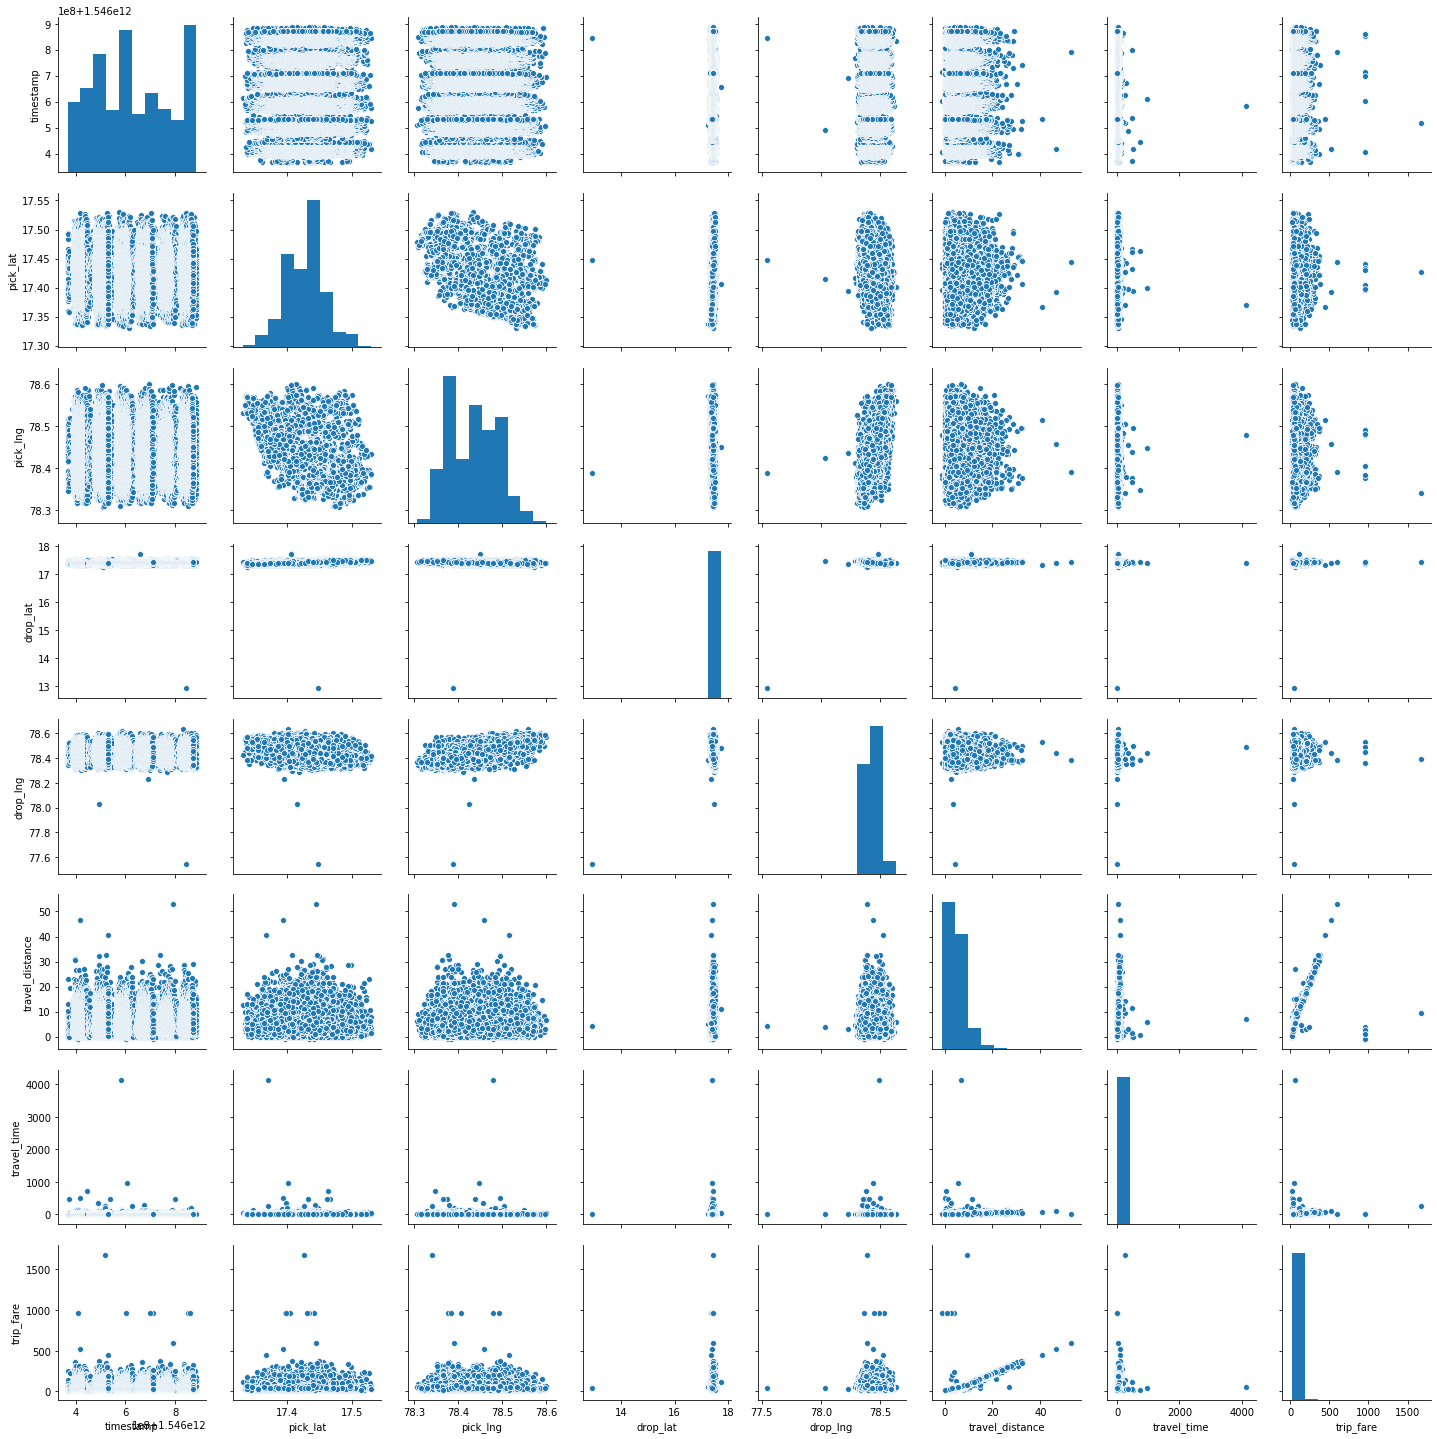

In [135]:
import seaborn as sb
sb.pairplot(rapido)


## Data Manipulation


### Data Time Conversion

In [136]:
import time;

datetime_list = pd.to_datetime(rapido['timestamp'],unit='ms')

# rapidodt_ts = pd.to_datetime(rapidodt['timestamp'],unit='ms')
# rapidodt['timestamp'] = rapidodt_ts
# rapidodt


# What is the average duration between the 1st trip and the 2nd trip of customers? Note: Consider only the customers who have done 2 or more trips.

In [137]:
rapidodt = rapido.copy()
# # rapidodt['timestamp'] = pd.to_datetime(rapidodt['timestamp'],unit='ms') 
rapidodt = rapidodt.drop(['pick_lat', 'pick_lng', 'drop_lat', 'drop_lng', 'travel_distance', 'travel_time', 'trip_fare'], axis=1)
# group_ct = rapidodt.groupby(['customer_id','trip_id'])


# for group, frames in group_ct:
#     print('\n---------------\n',str(group),'  --\n-- ',len(frames),'\n----*----')
# rapidodt = rapidodt[['customer_id','trip_id','timestamp','index']].groupby(['customer_id','trip_id'],sort = True,as_index=True)
# rapidodt.sum()
rapidodt.head()

,trip_id,customer_id,timestamp
0,ID001,CUST_001,1546709270211
1,ID002,CUST_002,1546709309524
2,ID003,CUST_003,1546709331857
3,ID004,CUST_004,1546709358403
4,ID005,CUST_005,1546709386884


In [138]:
rapidodt.loc[rapidodt['customer_id']== 'CUST_001']

,trip_id,customer_id,timestamp
0,ID001,CUST_001,1546709270211
1389,ID1390,CUST_001,1546871083066
1866,ID1867,CUST_001,1546873649099
4983,ID4984,CUST_001,1546765642873
5269,ID5270,CUST_001,1546769557670
5528,ID5529,CUST_001,1546773038937
33261,ID33262,CUST_001,1546676690138
36625,ID36626,CUST_001,1546702978281


In [139]:
rapido_series = rapidodt['customer_id'].value_counts()
rapido_series_index = rapido_series.index
rapido_series = rapido_series.tolist()

In [140]:
rapido2 = pd.DataFrame(data = rapido_series_index,columns=['Customer_ID'])
rapido2['trip_count'] = rapido_series

print('No of unique customer : ',len(rapido2))
rapido2.head()

No of unique customer :  19139


,Customer_ID,trip_count
0,CUST_279,53
1,CUST_4119,25
2,CUST_3100,25
3,CUST_1237,21
4,CUST_232,21


In [141]:
rapido2_filtered = rapido2[rapido2['trip_count']>=2]
rapido_filtered_customer_list = rapido2_filtered['Customer_ID'].tolist()

In [142]:
print('Number of customers with trips more than 1: ',len(rapido_filtered_customer_list))

Number of customers with trips more than 1:  9130


In [143]:
print(type(rapido_filtered_customer_list[0]))

rapidodt['customer_id'].astype(str)
rapidodt.head()

<class 'str'>


,trip_id,customer_id,timestamp
0,ID001,CUST_001,1546709270211
1,ID002,CUST_002,1546709309524
2,ID003,CUST_003,1546709331857
3,ID004,CUST_004,1546709358403
4,ID005,CUST_005,1546709386884


In [144]:
# Only have values od customer with more than one trip.

rapidodt = rapidodt[rapidodt.customer_id.isin(rapido_filtered_customer_list)] 
rapidodt.head()

,trip_id,customer_id,timestamp
0,ID001,CUST_001,1546709270211
2,ID003,CUST_003,1546709331857
3,ID004,CUST_004,1546709358403
4,ID005,CUST_005,1546709386884
5,ID006,CUST_006,1546709396752


In [145]:
# rapidodt  =  rapidodt[['customer_id','trip_id','timestamp','index']].groupby(['customer_id','trip_id'],sort=False).sum()

rapidodt.head()

,trip_id,customer_id,timestamp
0,ID001,CUST_001,1546709270211
2,ID003,CUST_003,1546709331857
3,ID004,CUST_004,1546709358403
4,ID005,CUST_005,1546709386884
5,ID006,CUST_006,1546709396752


In [146]:
# #initial addition
rapidodt_top2 = pd.DataFrame()
# rap = rapidodt.loc[rapidodt['customer_id']== 'CUST_279'].sort_values('timestamp').head(2)

In [147]:
for customer_id in rapido_filtered_customer_list:
    df_temp = rapidodt.loc[rapidodt['customer_id']== customer_id].sort_values('timestamp').head(2)
    rapidodt_top2 = rapidodt_top2.append(df_temp)


In [148]:
rapidodt_top2.head()

,trip_id,customer_id,timestamp
17350,ID17351,CUST_279,1546408754312
17583,ID17584,CUST_279,1546410838294
19645,ID19646,CUST_4119,1546429633914
20432,ID20433,CUST_4119,1546434116379
15398,ID15399,CUST_3100,1546397283038


In [149]:
rapido_customer_avg = pd.DataFrame(data=rapido_filtered_customer_list,columns=['customer_id'])
rapidodt_top2['timestamp'] = pd.to_datetime(rapidodt_top2['timestamp'],unit='ms')
rapidodt_top2.head()

,trip_id,customer_id,timestamp
17350,ID17351,CUST_279,2019-01-02 05:59:14.312
17583,ID17584,CUST_279,2019-01-02 06:33:58.294
19645,ID19646,CUST_4119,2019-01-02 11:47:13.914
20432,ID20433,CUST_4119,2019-01-02 13:01:56.379
15398,ID15399,CUST_3100,2019-01-02 02:48:03.038


In [150]:
l = []
for customer_id in rapido_filtered_customer_list:
    temp = rapidodt_top2.loc[rapidodt['customer_id']== customer_id] 
    var = temp.iloc[1]['timestamp'] - temp.iloc[0]['timestamp']
    l.append(var)


In [151]:
print(rapidodt_top2.iloc[1]['timestamp'])
print(rapidodt_top2.iloc[0]['timestamp'])
print(rapidodt_top2.iloc[3]['timestamp'])
print(rapidodt_top2.iloc[2]['timestamp'])
a = (rapidodt_top2.iloc[1]['timestamp'] - rapidodt_top2.iloc[0]['timestamp'])
b = (rapidodt_top2.iloc[3]['timestamp'] - rapidodt_top2.iloc[2]['timestamp'])




2019-01-02 06:33:58.294000
2019-01-02 05:59:14.312000
2019-01-02 13:01:56.379000
2019-01-02 11:47:13.914000


# Part 3. Model building
Build a model to predict trip_fare using travel_distance and travel_time. Measure the accuracy of the
model and use the model to predict trip_fare for a trip with travel_distance of 3.5 kms and travel_time
of 15 minutes.


Train Data = ['travel_distance','travel_time']
</br>
Test Data =[3.5,15]

fit the model 
predict

Serial No.|Column names|       Description
---|---|---
1 |         travel_distance   |  Distance of trip measured in KMs
2 |         travel_time        | Duration of the trip measured in Minutes
3|          trip_fare           |Trip fare calculated in Rupees


Data Cleaning

In [152]:
rapido_model = rapido[['travel_distance', 'travel_time', 'trip_fare']]
# print(rapido_model.sort_values('travel_distance').head(40))


# print('Anomaly Detected, Following customers have ',rapido[rapido['travel_distance'] == -1.0].head())
rapido_model = rapido_model[rapido_model['travel_distance'] > 0]
rapido_model.head()

,travel_distance,travel_time,trip_fare
0,2.806,12.609667,37
1,11.991,24.075200,119
2,1.322,8.708300,27
3,11.822,24.037550,121
4,6.978,16.120867,58


In [153]:
rapido_model['travel_distance'].value_counts(normalize= True,bins=10)

(-0.0528, 5.281]    0.625369
(5.281, 10.561]     0.306789
(10.561, 15.841]    0.054427
(15.841, 21.121]    0.011025
(21.121, 26.401]    0.001849
(26.401, 31.681]    0.000406
(31.681, 36.961]    0.000068
(47.521, 52.801]    0.000023
(42.241, 47.521]    0.000023
(36.961, 42.241]    0.000023
Name: travel_distance, dtype: float64

In [154]:
# Speed - 10 - 120
# Trip-Fari = < 522
rapido_model['speed'] = rapido_model['travel_distance']/(rapido_model['travel_time']/60)
rapido_model.sort_values(['travel_distance'],ascending=False).head(20)

# Choosing value of speed between 10 and 120
rapido_model = rapido_model[rapido_model['speed'].between(10,120)]

rapido_model.sort_values('trip_fare',ascending=False).head()

rapido_model = rapido_model[rapido_model['trip_fare']<522] ## values above 522 are anomalied as the data do not add up.
rapido_model.sort_values('travel_time',ascending=False).head()

,travel_distance,travel_time,trip_fare,speed
32164,25.690,142.484950,275,10.817985
18078,26.676,122.900400,314,13.023229
14422,20.544,117.289150,239,10.509412
40951,18.706,108.660950,199,10.329010
17500,19.886,107.459217,226,11.103375


In [155]:
print ('\nThere are no missing values:\n', rapido_model.isnull().sum())


There are no missing values:
 travel_distance    0
travel_time        0
trip_fare          0
speed              0
dtype: int64


In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [157]:
# Splitting into two 
train_data = rapido_model[['travel_distance','travel_time']]
labels = rapido_model['trip_fare']

X_train,X_test,Y_train,Y_test = train_test_split(train_data,labels,random_state=0)


lr = LogisticRegression(multi_class='ovr',solver='liblinear')
lr.fit(X_train,Y_train)
# predictions   = lr.predict(X_test)
# probabilities = lr.predict_proba(X_test)
# print ("Accuracy   Score : ",accuracy_score(Y_test,predictions))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [158]:
avg_trip = rapido_model[rapido_model['travel_distance']== 3.5]
avg_trip

,travel_distance,travel_time,trip_fare,speed
950,3.5,6.468933,40,32.462848
4829,3.5,6.410500,32,32.758755
5364,3.5,9.746517,40,21.546159
12479,3.5,10.469333,44,20.058584
16128,3.5,10.393767,37,20.204417
19862,3.5,9.023967,43,23.271363
26661,3.5,9.469833,41,22.175681
30965,3.5,5.386283,45,38.987923
31590,3.5,9.616333,41,21.837845
40451,3.5,13.037350,41,16.107568


In [159]:
# df= pd.DataFrame([predictions.T,Y_train.T])
# df.transpose()

X_test_2 = pd.DataFrame([[3.5,15.0]],columns=['travel_distance','travel_time'])

# X_test_2['travel_distance'] = 3.5
# X_test_2['travel_time'] = 15.0
X_test_2
prediction = lr.predict(X_test_2)
# print ("Accuracy   Score : ",accuracy_score(,predictions))
prediction

array([43], dtype=int64)

# Part 4. Top Hex clusters
Top 5 pairs of hex (resolution=8) clusters where most of the trips happened? You can refer to the
library listed below to get hexid for a given latitude and longitude.
-  https://github.com/uber/h3-py

Expected output

Rank Hex | pair (source_hexid, destination_hexid) |  Total trips
---|---|---
1 | 883c8e4159fffff to 88754e6499fffff |34
2 | 883db66b55fffff to 883c8e4159fffff | 28

In [195]:
#References - https://github.com/uber/h3-py
#           - https://github.com/uber/h3-py-notebooks
from h3 import h3
rapido_hex_geo = rapido.copy()
resolution=8
rapido_hex.head()
rapido_hex_geo = rapido_hex_geo[['pick_lat','pick_lng','drop_lat','drop_lng']]
rapido_hex_geo["hex_id_pick"] = rapido_hex_geo.apply(lambda row: h3.geo_to_h3(row["pick_lat"], row["pick_lng"], resolution), axis = 1)
rapido_hex_geo["hex_id_drop"] = rapido_hex_geo.apply(lambda row: h3.geo_to_h3(row["pick_lat"], row["pick_lng"], resolution), axis = 1)

In [196]:
rapido_hex_geo.head()

,pick_lat,pick_lng,drop_lat,drop_lng,hex_id_pick,hex_id_drop
0,17.442705,78.387878,17.457829,78.399056,8860a259b9fffff,8860a259b9fffff
1,17.490189,78.415512,17.450548,78.367294,8860b19695fffff,8860b19695fffff
2,17.370108,78.515045,17.377041,78.517921,8860a25b4dfffff,8860a25b4dfffff
3,17.439314,78.443001,17.397131,78.516586,8860a25915fffff,8860a25915fffff
4,17.432325,78.381966,17.401625,78.400032,8860a25995fffff,8860a25995fffff


In [197]:
# rapido_hex_geo.groupby(['hex_id_pick','hex_id_drop']).agg({i:'value_counts' for i in rapido_hex_geo.columns[5:]})
rapido_hex_geo2 = rapido_hex_geo.groupby(["hex_id_pick", "hex_id_drop"]).size().reset_index(name="count")
rapido_hex_geo2 = rapido_hex_geo2.sort_values('count',ascending=False)

In [198]:
rapido_hex_geo2.head()

,hex_id_pick,hex_id_drop,count
236,8860a259b9fffff,8860a259b9fffff,1288
237,8860a259bbfffff,8860a259bbfffff,933
220,8860a25995fffff,8860a25995fffff,933
49,8860a24a65fffff,8860a24a65fffff,798
53,8860a24a6dfffff,8860a24a6dfffff,720


In [199]:
rapido_hex_geo2["Hex pair (source_hexid, destination_hexid)"] = rapido_hex_geo2["hex_id_pick"].astype(str) + ' to ' + rapido_hex_geo2["hex_id_drop"]
rapido_hex_geo2 = rapido_hex_geo2.head()

In [200]:
rapido_hex_geo3= rapido_hex_geo2[['Hex pair (source_hexid, destination_hexid)','Trips']]
# rapido_hex_geo2.index.name = 'Rank'
rapido_hex_geo3 = rapido_hex_geo3.reset_index(drop = True)

In [203]:
rapido_hex_geo3.index.name='Rank'

In [206]:
rapido_hex_geo3.index = np.arange(1,len(rapido_hex_geo3)+1)
rapido_hex_geo3

,"Hex pair (source_hexid, destination_hexid)",count
1,8860a259b9fffff to 8860a259b9fffff,1288
2,8860a259bbfffff to 8860a259bbfffff,933
3,8860a25995fffff to 8860a25995fffff,933
4,8860a24a65fffff to 8860a24a65fffff,798
5,8860a24a6dfffff to 8860a24a6dfffff,720
